In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime as dt
from o2_vix import get_fedwatchprob, get_range, get_cross_sec_avg, get_range_multi, random_date
os.chdir("C:/Users/zheng/Documents/Finance Research/")
plt.style.use('ggplot')

### Daily (10D) VIX, VIX Futures and FOMC

#### Update to o2_2

In [2]:
vix_10d = pd.read_csv("Data/filtered/vix_10d.csv")
vix_10d.shape

(3087, 5)

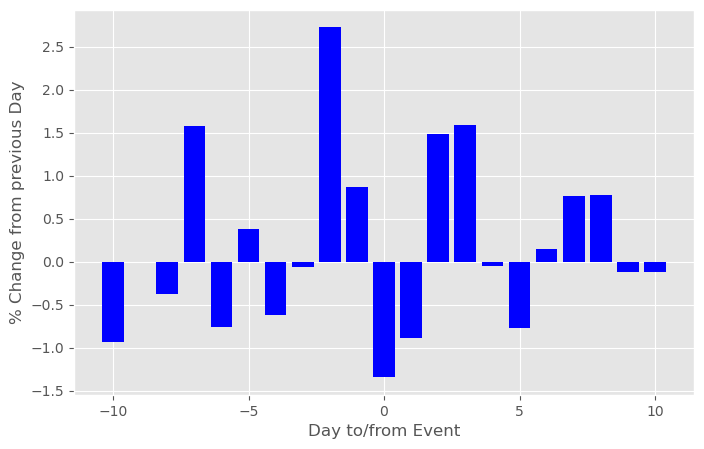

The Change % of T-7 is significant, degrees of freedom: 146
The Change % of T-2 is significant, degrees of freedom: 146
The Change % of T0 is significant, degrees of freedom: 146
The Change % of T2 is significant, degrees of freedom: 146
The Change % of T3 is significant, degrees of freedom: 146


,Datetime Label,Change %
0,-10,-0.940157
1,-9,-0.005510
2,-8,-0.371259
3,-7,1.579781
4,-6,-0.766427
5,-5,0.380802
6,-4,-0.622325
7,-3,-0.057249
8,-2,2.726038
9,-1,0.870924


In [3]:
get_cross_sec_avg(vix_10d, pct_change=False, freq='Day')

In [4]:
vix_fut_10d = pd.read_csv("Data/filtered/vix_fut_10d.csv")
vix_fut_10d.head()

,Event Datetime,Datetime,Price,Open,High,Low,Datetime Label,Change %
0,2009-11-04,2009-10-20,24.55,24.65,24.95,24.33,-10,-0.405680
1,2009-11-04,2009-10-21,24.52,24.55,25.05,23.88,-9,-0.122200
2,2009-11-04,2009-10-22,23.63,24.52,25.23,23.63,-8,-3.629690
3,2009-11-04,2009-10-23,24.08,23.63,24.38,23.40,-7,1.904359
4,2009-11-04,2009-10-26,24.58,24.08,25.17,23.48,-6,2.076412


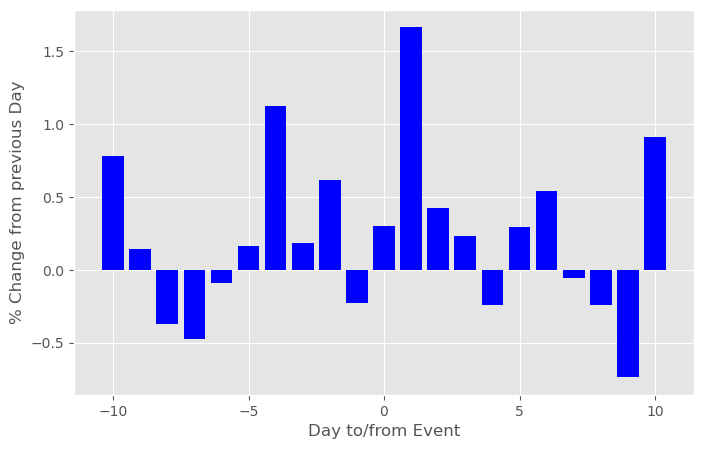

The Change % of T1 is significant, degrees of freedom: 96


,Datetime Label,Change %
0,-10,0.780530
1,-9,0.144940
2,-8,-0.373052
3,-7,-0.471964
4,-6,-0.093038
5,-5,0.160783
6,-4,1.123827
7,-3,0.181091
8,-2,0.618384
9,-1,-0.228012


In [5]:
get_cross_sec_avg(vix_fut_10d, pct_change=False, freq='Day')

#### Other 10 days range interval distributions

In [79]:
vix_index = pd.read_csv("Data/vix_futures/data/vix_futures/IAP/IAP.csv")
vix_index["Datetime"] = pd.to_datetime(vix_index["Date"] + " " + vix_index["Time"], format="%m/%d/%Y %H:%M:%S.%f")
vix_index["Datetime"] = vix_index["Datetime"] + timedelta(hours=1) # Adjust time to ET
vix_index.set_index('Datetime', inplace=True)
vix_index.drop(['Date', 'Time'], axis = 1, inplace=True)
vix_index.head()

,Price
Datetime,
2003-07-01 09:45:05,22.47
2003-07-01 09:46:05,22.46
2003-07-01 09:47:05,22.20
2003-07-01 09:48:05,22.44
2003-07-01 09:49:05,22.34


In [69]:
vix_fut = pd.read_csv("Data/vix_futures/S&P 500 VIX Futures Historical Data.csv")
vix_fut['Datetime'] = pd.to_datetime(vix_fut["Date"], format="%m/%d/%Y") 
vix_fut = vix_fut.set_index("Datetime")
vix_fut.drop(['Date', 'Change %', 'Vol.'], axis = 1, inplace=True)
vix_fut.sort_index(inplace=True)
vix_fut.head()

,Price,Open,High,Low
Datetime,,,,
2009-10-14,23.23,23.52,23.63,22.75
2009-10-15,22.38,23.23,23.58,22.38
2009-10-16,22.38,22.38,23.15,22.08
2009-10-19,24.65,22.38,25.25,22.38
2009-10-20,24.55,24.65,24.95,24.33


##### Random dates

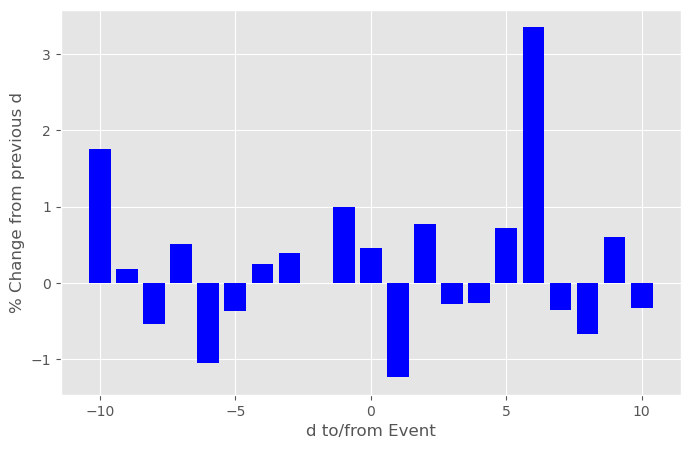

The Change % of T1 is significant, degrees of freedom: 63


,Datetime Label,Change %
0,-10,1.757774
1,-9,0.178126
2,-8,-0.540169
3,-7,0.513381
4,-6,-1.049083
5,-5,-0.368256
6,-4,0.242160
7,-3,0.390747
8,-2,-0.000577
9,-1,0.991193


In [70]:
random_dt = random_date(vix_fut.index[0], vix_fut.index[-1], 100)
vix_fut_10drand = get_range(vix_fut, random_dt, 10, 10, 'd')
get_cross_sec_avg(vix_fut_10drand)

In [71]:
event_df = pd.read_csv("Data/macro/data/macro/macro_announcement_dates_202112.csv")
for col in event_df.columns:
    event_df[col] = pd.to_datetime(event_df[col], format="%m/%d/%Y")
event_df.columns

Index(['Unemployment Rate', 'Consumer Price Index', 'Producer Price Index',
       'CFNAI', 'EIA', 'OPEC', 'IEA', 'Old_FOMC', 'New_FOMC',
       'GDP Annualized Advanced', 'GDP Annualized Preliminary',
       'GDP Annualized Final', 'Housing', 'Consumer Credit', 'ISM/NAPM',
       'IP/Capacity Utilization', 'Durable Goods Orders', 'Housing Starts',
       'Leading Indicators', 'Trade Balance', 'Advance Retail Sales',
       'Business Inventories', 'Construction Spending', 'Consumer Confidence',
       'Factory Orders', 'New Home Sales', 'Personal Consumption',
       'Monthly Budget Statement', 'Initial Jobless Claims',
       'Chicago Purchasing Manager Index', 'U. Michigan Consumer Confidence P',
       'U. Michigan Consumer Confidence F',
       'Actual fed funds target rate FFTR', 'Inflation'],
      dtype='object')

##### CPI

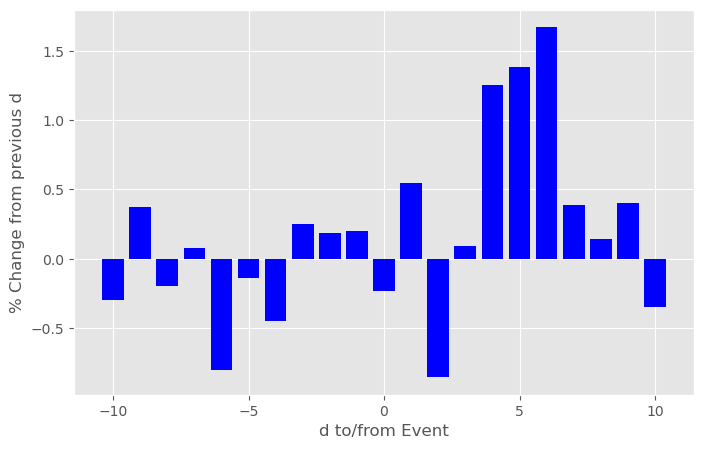

The Change % of T4 is significant, degrees of freedom: 143
The Change % of T5 is significant, degrees of freedom: 143
The Change % of T6 is significant, degrees of freedom: 143


,Datetime Label,Change %
0,-10,-0.296037
1,-9,0.373154
2,-8,-0.195654
3,-7,0.074586
4,-6,-0.802021
5,-5,-0.140079
6,-4,-0.449257
7,-3,0.249395
8,-2,0.182521
9,-1,0.202749


In [75]:
cpi_dt = list(event_df['Consumer Price Index'].dropna())
vix_fut_cpi_10drand = get_range(vix_fut, cpi_dt, 10, 10, 'd')
get_cross_sec_avg(vix_fut_cpi_10drand)

##### Unemployment Rate

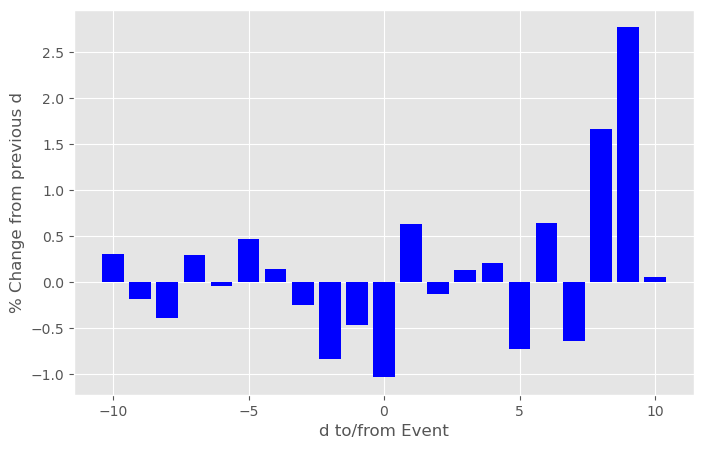

The Change % of T-2 is significant, degrees of freedom: 143
The Change % of T0 is significant, degrees of freedom: 143
The Change % of T8 is significant, degrees of freedom: 143
The Change % of T9 is significant, degrees of freedom: 143


,Datetime Label,Change %
0,-10,0.307354
1,-9,-0.182278
2,-8,-0.386978
3,-7,0.299657
4,-6,-0.035838
5,-5,0.469128
6,-4,0.143374
7,-3,-0.249840
8,-2,-0.829343
9,-1,-0.462149


In [76]:
ur_dt = list(event_df['Unemployment Rate'].dropna())
vix_fut_ur_10drand = get_range(vix_fut, ur_dt, 10, 10, 'd')
get_cross_sec_avg(vix_fut_ur_10drand)

##### Initial Jobless Claims

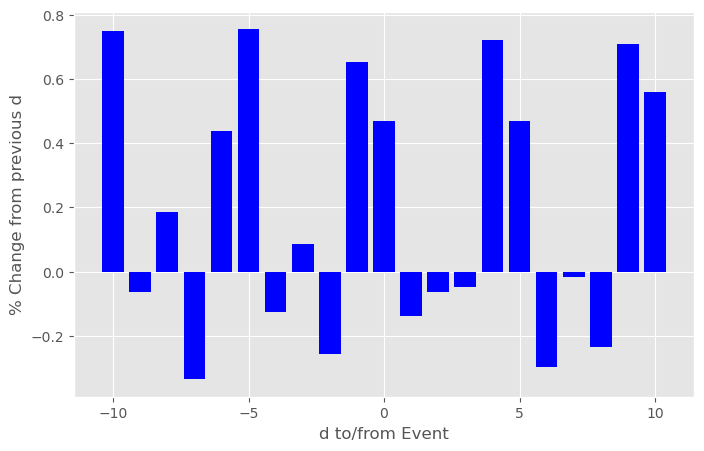

The Change % of T-10 is significant, degrees of freedom: 484
The Change % of T-5 is significant, degrees of freedom: 484
The Change % of T-1 is significant, degrees of freedom: 484
The Change % of T4 is significant, degrees of freedom: 484
The Change % of T9 is significant, degrees of freedom: 484


,Datetime Label,Change %
0,-10,0.750350
1,-9,-0.063548
2,-8,0.185351
3,-7,-0.335611
4,-6,0.436750
5,-5,0.755353
6,-4,-0.126227
7,-3,0.086115
8,-2,-0.255455
9,-1,0.652888


In [77]:
ijc_dt = list(event_df['Initial Jobless Claims'].dropna())
vix_fut_ijc_10drand = get_range(vix_fut, ijc_dt, 10, 10, 'd')
get_cross_sec_avg(vix_fut_ijc_10drand) 

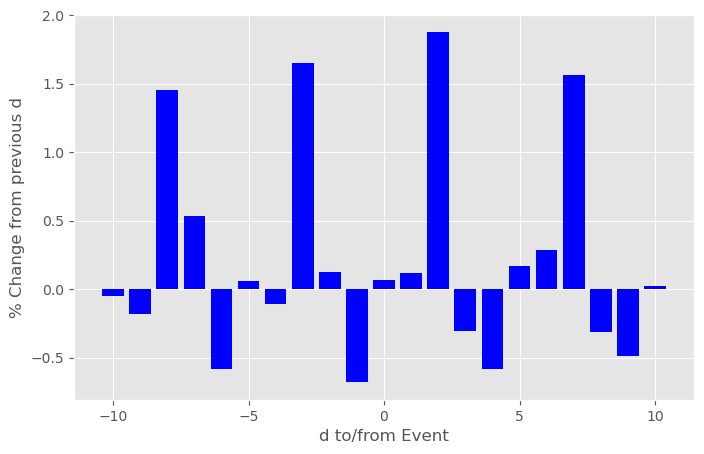

The Change % of T-8 is significant, degrees of freedom: 812
The Change % of T-6 is significant, degrees of freedom: 812
The Change % of T-3 is significant, degrees of freedom: 812
The Change % of T-1 is significant, degrees of freedom: 812
The Change % of T2 is significant, degrees of freedom: 812
The Change % of T4 is significant, degrees of freedom: 812
The Change % of T7 is significant, degrees of freedom: 812
The Change % of T9 is significant, degrees of freedom: 812


,Datetime Label,Change %
0,-10,-0.047008
1,-9,-0.177835
2,-8,1.459028
3,-7,0.534210
4,-6,-0.578819
5,-5,0.060736
6,-4,-0.106224
7,-3,1.654022
8,-2,0.125706
9,-1,-0.677717


In [80]:
vix_ijc_10drand = get_range(vix_index, ijc_dt, 10, 10, 'd')
get_cross_sec_avg(vix_ijc_10drand) 

### Hourly 10 Hours VIX, VIX Futures and FOMC

In [17]:
vix_10h = pd.read_csv("Data/filtered/vix_10h.csv")
vix_10h.shape

(3087, 5)

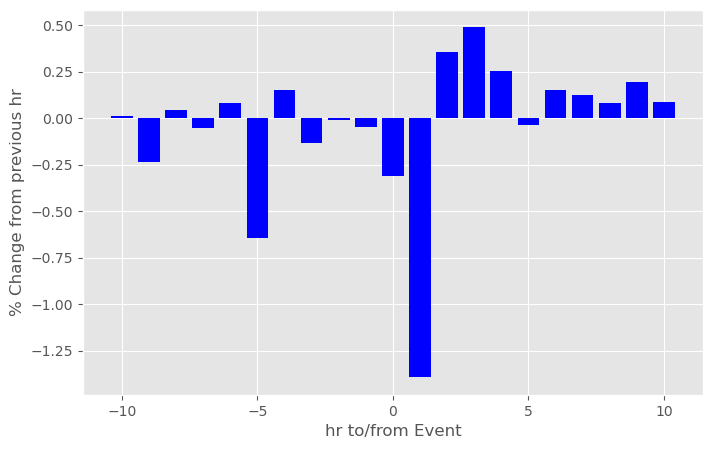

The Change % of T-9 is significant, degrees of freedom: 146
The Change % of T-5 is significant, degrees of freedom: 146
The Change % of T0 is significant, degrees of freedom: 146
The Change % of T1 is significant, degrees of freedom: 146


,Datetime Label,Change %
0,-10,0.010384
1,-9,-0.237034
2,-8,0.046132
3,-7,-0.052640
4,-6,0.080602
5,-5,-0.643703
6,-4,0.150699
7,-3,-0.134473
8,-2,-0.008964
9,-1,-0.048934


In [18]:
get_cross_sec_avg(vix_10h, pct_change=False, freq='hr')

In [19]:
vix_fut_10h = pd.read_csv("Data/filtered/vix_fut_10h.csv")
vix_fut_10h.shape

(1491, 21)

In [20]:
np.corrcoef(vix_fut_10h[vix_fut_10h['Datetime Label']==1]['Change %'], vix_fut_10h[vix_fut_10h['Datetime Label']==2]['Change %'])

array([[ 1.        , -0.03359197],
       [-0.03359197,  1.        ]])

(array([ 1.,  5.,  3.,  7., 20., 21.,  6.,  5.,  1.,  2.]),
 array([-7.00389105, -5.66052394, -4.31715683, -2.97378973, -1.63042262,
        -0.28705551,  1.0563116 ,  2.39967871,  3.74304582,  5.08641293,
         6.42978003]),
 <BarContainer object of 10 artists>)

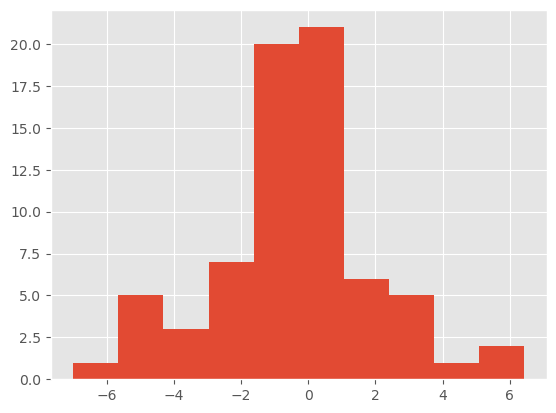

In [134]:
plt.hist(vix_fut_10h[vix_fut_10h['Datetime Label']==1]['Change %'])

(array([ 1.,  3.,  4., 21., 24., 12.,  4.,  0.,  1.,  1.]),
 array([-5.36912752, -3.99539468, -2.62166185, -1.24792901,  0.12580382,
         1.49953666,  2.8732695 ,  4.24700233,  5.62073517,  6.994468  ,
         8.36820084]),
 <BarContainer object of 10 artists>)

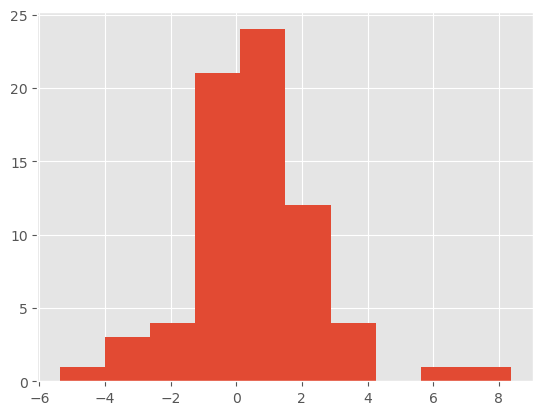

In [135]:
plt.hist(vix_fut_10h[vix_fut_10h['Datetime Label']==2]['Change %'])

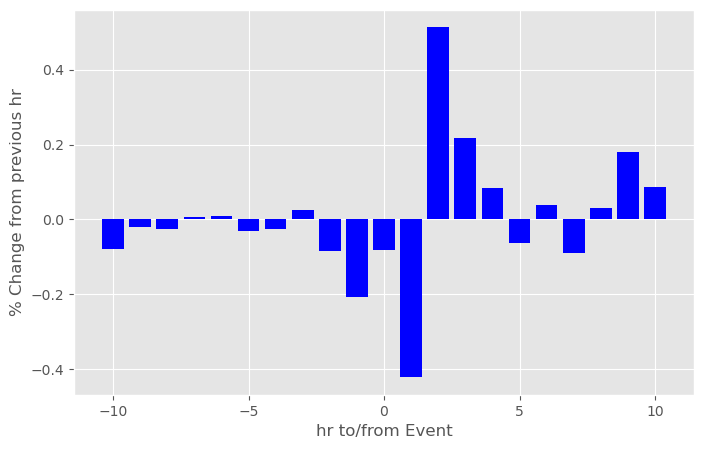

The Change % of T2 is significant, degrees of freedom: 70
The Change % of T9 is significant, degrees of freedom: 70


,Datetime Label,Change %
0,-10,-0.079501
1,-9,-0.019202
2,-8,-0.025833
3,-7,0.007033
4,-6,0.009099
5,-5,-0.031644
6,-4,-0.026057
7,-3,0.024107
8,-2,-0.084701
9,-1,-0.206001


In [21]:
get_cross_sec_avg(vix_fut_10h, pct_change=False, freq='hr')

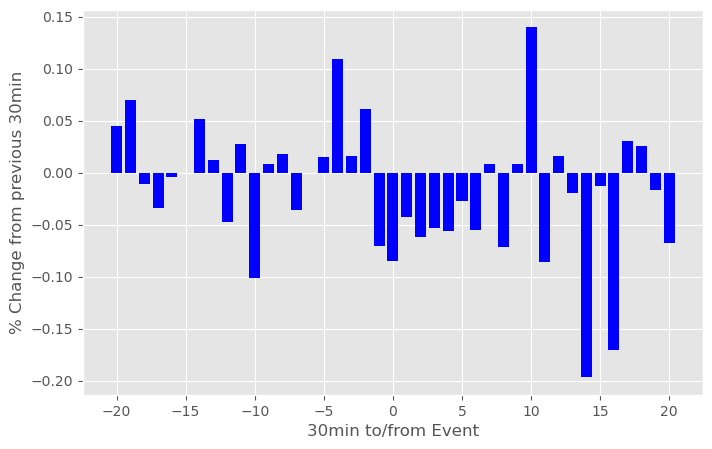

The Change % of T10 is significant, degrees of freedom: 105


,Datetime Label,Change %
0,-20,0.044718
1,-19,0.069764
2,-18,-0.010478
3,-17,-0.034123
4,-16,-0.003885
5,-15,-0.000337
6,-14,0.051794
7,-13,0.011968
8,-12,-0.047054
9,-11,0.027665


In [83]:
#CPI
cpi_datetimes = event_df['Consumer Price Index'] + pd.Timedelta(hours=8.5)
cpi_datetimes = list(cpi_datetimes.dropna())
vix_fut_cpi_10hr = get_range_multi(cpi_datetimes, 1, 20, '30min')
get_cross_sec_avg(vix_fut_cpi_10hr, price=True, freq='30min')

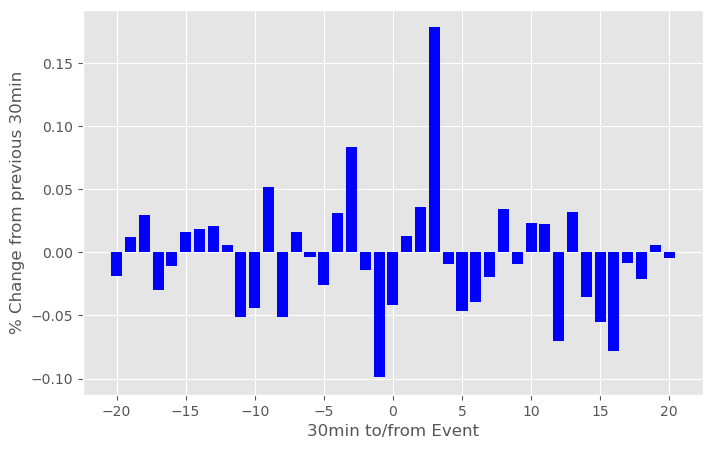

The Change % of T-3 is significant, degrees of freedom: 344
The Change % of T-1 is significant, degrees of freedom: 344
The Change % of T3 is significant, degrees of freedom: 344


,Datetime Label,Change %
0,-20,-0.018525
1,-19,0.012054
2,-18,0.029232
3,-17,-0.030042
4,-16,-0.010840
5,-15,0.016022
6,-14,0.018629
7,-13,0.021116
8,-12,0.005890
9,-11,-0.051422


In [84]:
# Ininital Jobless Claim
ijr_datetimes = event_df['Initial Jobless Claims'] + pd.Timedelta(hours=8.5)
ijr_datetimes = list(ijr_datetimes.dropna())
vix_fut_ijr_10hr = get_range_multi(ijr_datetimes, 1, 20, '30min')
get_cross_sec_avg(vix_fut_ijr_10hr, price=True, freq='30min')

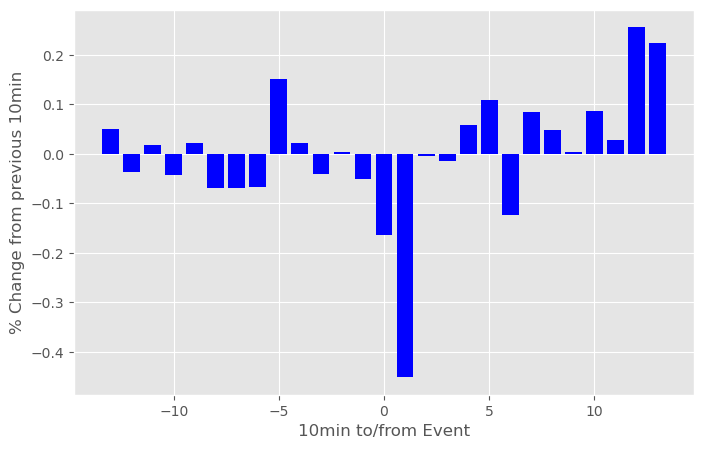

The Change % of T-5 is significant, degrees of freedom: 70
The Change % of T0 is significant, degrees of freedom: 70
The Change % of T1 is significant, degrees of freedom: 70
The Change % of T12 is significant, degrees of freedom: 70


,Datetime Label,Change %
0,-13,0.050930
1,-12,-0.036194
2,-11,0.018719
3,-10,-0.042221
4,-9,0.021110
5,-8,-0.068675
6,-7,-0.067931
7,-6,-0.067246
8,-5,0.150521
9,-4,0.021158


In [88]:
fomc_datetimes = event_df['New_FOMC'] + pd.Timedelta(hours=14)
fomc_datetimes = list(fomc_datetimes.dropna())
get_cross_sec_avg(get_range_multi(fomc_datetimes, 1, 13, '10min'), price=True, freq='10min')

### Properties of FOMC

#### Uncertainty

In [27]:
get_fedwatchprob(dt(2024, 8, 30), 1)

,WatchDate,FOMCDate,5.00-5.25,5.25-5.50
0,2024-08-30,2024-09-18,0.68,0.32


In [29]:
effr = pd.read_csv('Data/effr.csv')
effr['Effective Date'] = pd.to_datetime(effr['Effective Date'], format="%m/%d/%Y")
effr.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),Intra Day - Low (%),Intra Day - High (%),Standard Deviation (%),30-Day Average SOFR,90-Day Average SOFR,180-Day Average SOFR,SOFR Index,Revision Indicator (Y/N),Footnote ID
0,2024-09-05,EFFR,5.33,5.31,5.32,5.33,5.35,102.0,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-04,EFFR,5.33,5.31,5.32,5.33,5.35,103.0,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-03,EFFR,5.33,5.31,5.32,5.33,5.35,100.0,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-30,EFFR,5.33,5.31,5.32,5.33,5.35,89.0,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-29,EFFR,5.33,5.31,5.32,5.33,5.35,97.0,5.25,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
fwprob = pd.read_csv("Data/fw_prob.csv")
fwprob.drop('Unnamed: 0', axis=1, inplace=True)
fwprob['WatchDate'] = pd.to_datetime(fwprob['WatchDate'], format="%Y-%m-%d")
fwprob.head()

,WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,4.50-4.75,4.25-4.50,3.50-3.75,3.75-4.00,...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
0,2024-09-05,2024-09-18,0.68,0.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-04,2024-09-18,0.68,0.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-03,2024-09-18,0.68,0.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-30,2024-09-18,0.68,0.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-29,2024-09-18,0.68,0.32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
effr_fwprob = effr.merge(fwprob, how='left', left_on = 'Effective Date', right_on = 'WatchDate')
effr_fwprob.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
0,2024-09-05,EFFR,5.33,5.31,5.32,5.33,5.35,102.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-04,EFFR,5.33,5.31,5.32,5.33,5.35,103.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-03,EFFR,5.33,5.31,5.32,5.33,5.35,100.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-30,EFFR,5.33,5.31,5.32,5.33,5.35,89.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-29,EFFR,5.33,5.31,5.32,5.33,5.35,97.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
effr_fwprob = effr_fwprob.dropna(axis=1, how='all')
effr_fwprob = pd.concat([effr_fwprob[['Effective Date', 'Rate (%)', 'Target Rate From (%)', 'Target Rate To (%)']],
                  effr_fwprob.iloc[:, 15:]], axis=1)
effr_fwprob.tail()

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
5447,2003-01-07,1.20,1.25,NaN,2003-01-07,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5448,2003-01-06,1.22,1.25,NaN,2003-01-06,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5449,2003-01-03,1.12,1.25,NaN,2003-01-03,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5450,2003-01-02,1.30,1.25,NaN,2003-01-02,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5451,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Because the fed watch futures data used by pyfedwatch is not complete, filter for dates with correct data
fomc_dates = vix_10d['Event Datetime'].unique()
fomc_dates = pd.to_datetime(fomc_dates, format="%Y-%m-%d")
effr_fwprob.set_index('Effective Date', inplace=True)
fomc_index = [effr_fwprob.index.get_loc(x) for x in fomc_dates]

Uncertainty 1: Substantial difference in estimated probaility days leading up to the coming fomc meeting

In [36]:
# filter for the days before FOMC day
filt_rows = [effr_fwprob.iloc[x+1:x+2, :].reset_index() for x in fomc_index]
effr_fwprob_prefomc = pd.concat(filt_rows, axis=0)
effr_fwprob_prefomc.head()

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
0,2003-08-11,1.02,1.0,NaN,2003-08-11,2003-08-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-09-15,1.11,1.0,NaN,2003-09-15,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-10-27,1.03,1.0,NaN,2003-10-27,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-12-08,0.99,1.0,NaN,2003-12-08,2003-12-09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2004-01-27,1.02,1.0,NaN,2004-01-27,2004-01-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
effr_fwprob_prefomc['Uncertain'] = (effr_fwprob_prefomc.iloc[:, 7:] > 0.2).sum(axis=1) >= 2

In [38]:
effr_fwprob_prefomc = effr_fwprob_prefomc[effr_fwprob_prefomc['Uncertain'] == True]

In [39]:
effr_fwprob_prefomc[effr_fwprob_prefomc['Effective Date'] == dt(2019, 7, 30)].dropna(axis=1)

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,2.00-2.25,1.75-2.00,Uncertain
0,2019-07-30,2.39,2.25,2.5,2019-07-30,2019-07-31,0.770333,0.229667,True


In [40]:
uncertain_fomc = pd.to_datetime(effr_fwprob_prefomc['FOMCDate'], format="%Y-%m-%d") + pd.Timedelta(hours=14)
uncertain_fomc = [str(x) for x in uncertain_fomc]

In [41]:
vix_fut_10h_uncert = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain_fomc)]

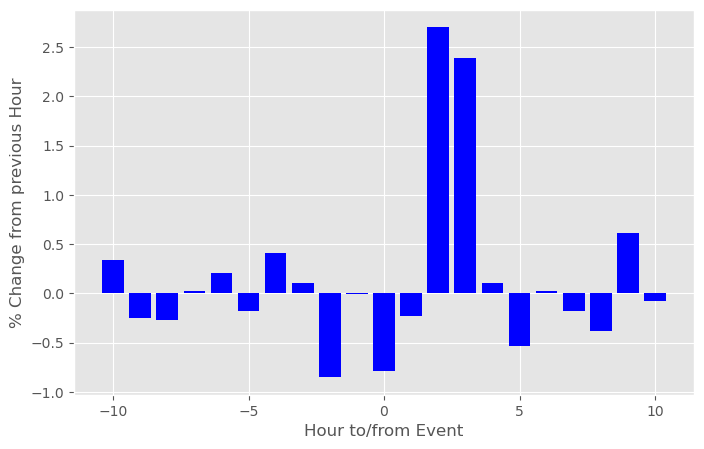

The Change % of T3 is significant, degrees of freedom: 3


,Datetime Label,Change %
0,-10,0.335041
1,-9,-0.245719
2,-8,-0.267154
3,-7,0.026647
4,-6,0.202772
5,-5,-0.179556
6,-4,0.410245
7,-3,0.107068
8,-2,-0.850773
9,-1,-0.007180


In [42]:
get_cross_sec_avg(vix_fut_10h_uncert, pct_change=False, freq='Hour')

In [43]:
vix_fut_10h_no_uncert = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain_fomc) == False]

In [44]:
np.corrcoef(vix_fut_10h_no_uncert[vix_fut_10h_no_uncert['Datetime Label']==1]['Change %'], vix_fut_10h_no_uncert[vix_fut_10h_no_uncert['Datetime Label']==2]['Change %'])

array([[1.        , 0.18801657],
       [0.18801657, 1.        ]])

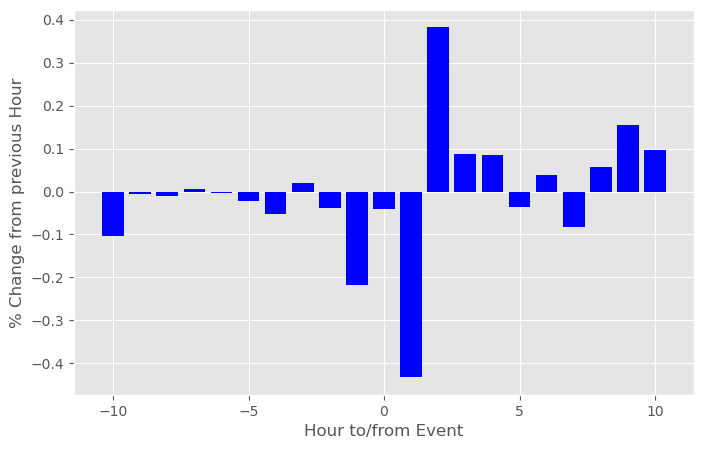

The Change % of T-1 is significant, degrees of freedom: 66
The Change % of T9 is significant, degrees of freedom: 66


,Datetime Label,Change %
0,-10,-0.104249
1,-9,-0.005678
2,-8,-0.011425
3,-7,0.005862
4,-6,-0.002463
5,-5,-0.022813
6,-4,-0.052105
7,-3,0.019155
8,-2,-0.038965
9,-1,-0.217871


In [45]:
get_cross_sec_avg(vix_fut_10h_no_uncert, pct_change=False, freq='Hour')

Uncertain 2: Day after FOMC, theres uncertainty in next FOMC adjustment probability 

In [46]:
filt_rows = [effr_fwprob.iloc[x-1:x, :].reset_index() for x in fomc_index]
effr_fwprob_postfomc = pd.concat(filt_rows, axis=0)
effr_fwprob_postfomc['Uncertain'] = (effr_fwprob_postfomc.iloc[:, 7:] > 0.2).sum(axis=1) >= 2
effr_fwprob_postfomc = effr_fwprob_postfomc[effr_fwprob_postfomc['Uncertain'] == True]
effr_fwprob_postfomc.head()

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00,Uncertain
0,2004-05-05,0.99,1.00,NaN,2004-05-05,2004-06-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2004-08-11,1.50,1.50,NaN,2004-08-11,2004-09-21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2004-09-22,1.78,1.75,NaN,2004-09-22,2004-11-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2005-03-23,2.73,2.75,NaN,2005-03-23,2005-05-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222069,0.777931,True
0,2005-09-21,3.72,3.75,NaN,2005-09-21,2005-11-01,NaN,NaN,NaN,NaN,...,0.690833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [47]:
uncertain2_fomc = pd.to_datetime(effr_fwprob_postfomc['FOMCDate'], format="%Y-%m-%d") + pd.Timedelta(hours=14)
uncertain2_fomc = [str(x) for x in uncertain2_fomc]
vix_fut_10h_uncert2 = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain2_fomc)]
vix_fut_10h_no_uncert2 = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain2_fomc) == False]

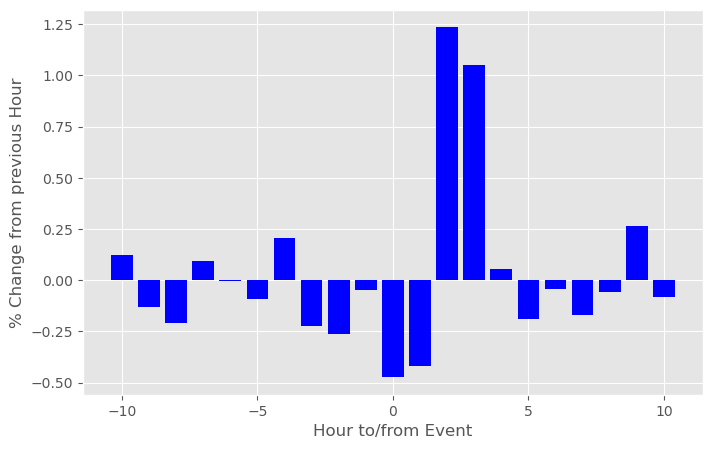

,Datetime Label,Change %
0,-10,0.124083
1,-9,-0.129765
2,-8,-0.210396
3,-7,0.093710
4,-6,-0.001553
5,-5,-0.089778
6,-4,0.208362
7,-3,-0.222786
8,-2,-0.263312
9,-1,-0.049030


In [48]:
get_cross_sec_avg(vix_fut_10h_uncert2, pct_change=False, freq='Hour')

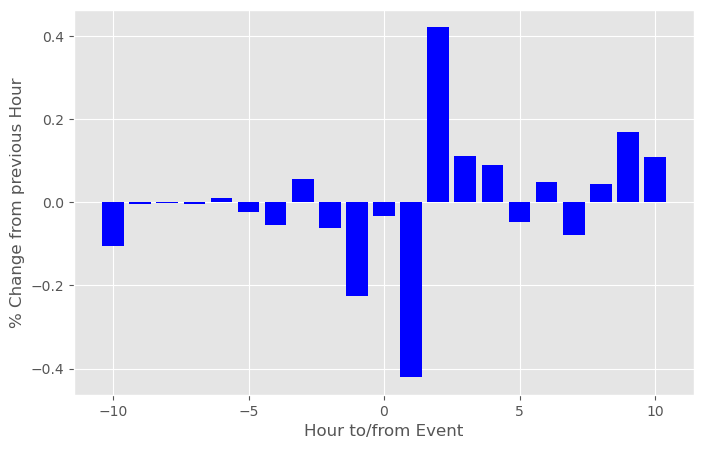

The Change % of T9 is significant, degrees of freedom: 62


,Datetime Label,Change %
0,-10,-0.105353
1,-9,-0.005162
2,-8,-0.002396
3,-7,-0.003973
4,-6,0.010452
5,-5,-0.024261
6,-4,-0.055825
7,-3,0.055459
8,-2,-0.062020
9,-1,-0.225934


In [49]:
get_cross_sec_avg(vix_fut_10h_no_uncert2, pct_change=False, freq='Hour')

3: FOMCs which changes are made to target funds rate

In [54]:
filt_rows = [effr_fwprob.iloc[x-1:x+2, :].reset_index() for x in fomc_index]
test = pd.concat(filt_rows, axis=0)
test['non_na']= test.iloc[:, 8:].apply(lambda row: row.index[row.notna()].tolist(), axis=1)
test.head()

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00,non_na
0,2003-08-13,1.01,1.0,NaN,2003-08-13,2003-09-15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.75, 1.00]"
1,2003-08-12,0.99,1.0,NaN,2003-08-12,2003-09-15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.75, 1.00]"
2,2003-08-11,1.02,1.0,NaN,2003-08-11,2003-08-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1.00, 1.25]"
0,2003-09-17,0.97,1.0,NaN,2003-09-17,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.75, 1.00]"
1,2003-09-16,0.97,1.0,NaN,2003-09-16,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.75, 1.00]"


In [55]:
df_1 = test.loc[test.index == 0].reset_index(drop=True)
df_2 = test.loc[test.index == 2].reset_index(drop=True)

In [58]:
df_1.shape

(147, 54)

In [59]:
df_2.shape

(147, 55)

In [57]:
df_2['Change'] = df_2['Target Rate From (%)'] - df_1['Target Rate From (%)']

In [60]:
effr_change_date = df_2[df_2['Change'] != 0]['FOMCDate']

In [64]:
fomc_change = pd.to_datetime(effr_change_date, format="%Y-%m-%d") + pd.Timedelta(hours=14)
fomc_change = [str(x) for x in fomc_change]
vix_fut_10h_change = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(fomc_change)]
vix_fut_10h_no_change = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(fomc_change) == False]

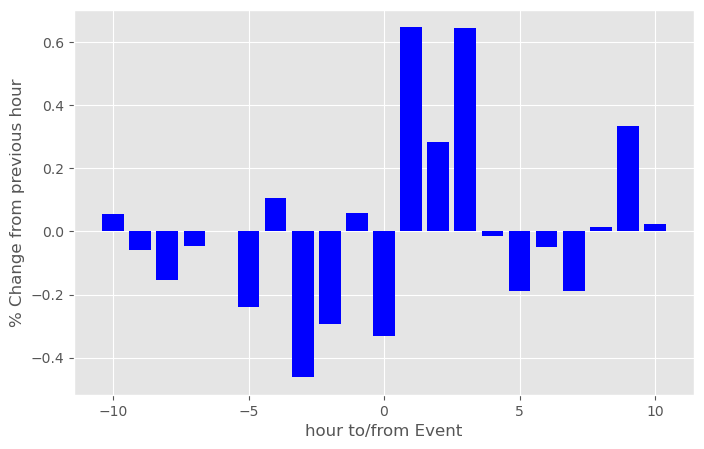

,Datetime Label,Change %
0,-10,0.056866
1,-9,-0.057868
2,-8,-0.155488
3,-7,-0.044923
4,-6,0.000104
5,-5,-0.239594
6,-4,0.104983
7,-3,-0.462144
8,-2,-0.292999
9,-1,0.058981


In [65]:
get_cross_sec_avg(vix_fut_10h_change, pct_change=False, freq='hour')

In [66]:
np.corrcoef(vix_fut_10h_no_change[vix_fut_10h_no_change['Datetime Label']==1]['Change %'], vix_fut_10h_no_change[vix_fut_10h_no_change['Datetime Label']==2]['Change %'])

array([[ 1.        , -0.02181853],
       [-0.02181853,  1.        ]])

In [67]:
np.corrcoef(vix_fut_10h_change[vix_fut_10h_change['Datetime Label']==1]['Change %'], vix_fut_10h_change[vix_fut_10h_change['Datetime Label']==2]['Change %'])

array([[ 1.        , -0.03863781],
       [-0.03863781,  1.        ]])

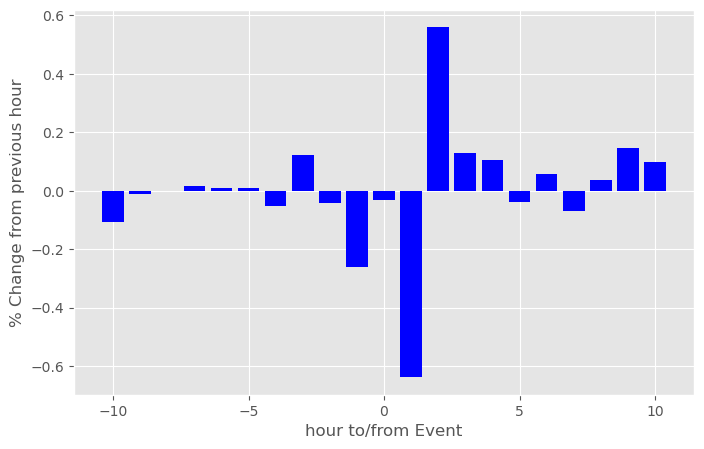

The Change % of T-1 is significant, degrees of freedom: 58
The Change % of T1 is significant, degrees of freedom: 58
The Change % of T9 is significant, degrees of freedom: 58


,Datetime Label,Change %
0,-10,-0.107236
1,-9,-0.011337
2,-8,0.000538
3,-7,0.017600
4,-6,0.010929
5,-5,0.010651
6,-4,-0.052709
7,-3,0.123006
8,-2,-0.042336
9,-1,-0.259896


In [68]:
get_cross_sec_avg(vix_fut_10h_no_change, pct_change=False, freq='hour')